<a href="https://colab.research.google.com/github/anishmahapatra/Classification-Telecom-Customer-Churn/blob/main/Classification_Telecom_Customer_Churn_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Customer Attrition in the Telecom Industry using Machine Learning

Master's in Data Science from<br/>
Liverpool John Moores University <br/>
*Date: April, 2020 <br/>
Author: Anish Mahapatra* 

This notebook is based on the IBM Watson Telecom Dataset. We will go through all of the steps:

- Data Selection
- Data Preprocessing
- Data Transformation
- Data Visualization
- Class Balancing
- Model Building
- Model Evaluation
- Model Review

<b>Aim:</b> <br/>The purpose of this notebook is to analyze, visualize and model (classification) [IBM Telecom Dataset](https://www.kaggle.com/wordsforthewise/lending-club).

The Telecom Dataset has been pulled from the IBM Watson Website. The level of the Data is at a <b>Customer Id</b> Level.



<a name="0"></a>
## Table of Contents

1 [Loading the Data](#1) <br/>
2 [Quick EDA](#2) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1 [Pandas Profiling](#2.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2 [SweetViz](#2.2) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3 [Dataprep](#2.3) <br/>
3 [Pre-processing](#3) <br/>


<a name="1"></a>
## 1 Loading the Data
Back to [Table of Contents](#0)

---


In [1]:
# Installing the required packages

! pip uninstall -y pandas-profiling &> /dev/null                # Package for pandas profiling - visualization
! pip install pandas-profiling[notebook,html] &> /dev/null      # Uninstalling and reinstalling it due to a bug in Google Colab
! pip install sweetviz &> /dev/null                             # Package for some sweet visualizations
! pip install -U dataprep &> /dev/null                          # Package for instant data preparation
! pip install --upgrade plotly &> /dev/null                     # Updating plotly to the latest version
! pip install jupyter-dash &> /dev/null                         # Installing jupyter-dash 

In [2]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import re
import os

# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# Hide Warnings
warnings.filterwarnings('ignore') #adjust display options

%matplotlib inline 

In [3]:
# Let us import the required packages

from dash.dependencies import Input, Output
from pandas_profiling import ProfileReport          # Pandas Profile to visualize the data
from dataprep.eda import plot_correlation           # Importing a package to visualize data correlation
from dataprep.eda import plot_missing               # Importing packge to plot the missing values of the dataset
from jupyter_dash import JupyterDash                # Importing Jupter Dash to use visualization components 

from IPython.display import display                 # Displaying widgets
import dash_html_components as html                 # To leverage html components in the visualization
import dash_core_components as dcc                  # Importing dash core components for visualization
import matplotlib.ticker as ticker                  # User-defined function for formatting graphs
import plotly.graph_objects as go                   # To use graph objects within visualizations

from plotly.offline import iplot                    # Used for interactive plots
import matplotlib.pyplot as plt                     # Importing matplotlib for visualization
from dataprep.eda import plot                       # Importing package to plot/ visualize features of the dataset
import ipywidgets as widgets                        # Creating widgets
import plotly.express as px                         # Importing plotly express for visualizations
import matplotlib.cm as cm                          # Colormaps, colormaps handling utilities

import pandas_profiling                             # Automatic EDA
import sweetviz as sv                               # Importing sweetviz for some sweet visualizations
import seaborn as sns                               # Importing seaborn for visualization
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
%matplotlib inline    
import warnings                                     # Importing package to toggle warnings
import IPython                                      # Importing ipython for displaying html files in the notebook

# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Hide Warnings
warnings.filterwarnings('ignore')

NumExpr defaulting to 2 threads.


In [4]:
# Reading the file onto Google Colab from GitHub using pandas library
telecomDf = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/Telecom-Customer-Churn/main/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")    # Reading file zomato.csv

In [5]:
df = telecomDf.copy(deep = True)
# Viewing the head of the data
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [6]:
df.shape

(7043, 21)

In [7]:
# Let's view a summary of the dataset now
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<a name="2"></a>
## 2 Quick EDA
Back to [Table of Contents](#0)

---


Now that we have some basic data understanding of the data we are dealing with, it's time to try and understand things a little more in details. We will proceed to <b>analyze and explore the data</b>. There is a common term in the Data Science community that we use to describe this: <u>Exploratory Data Analysis</u> (<b>[EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)</b>).</n>


Exploratory Data Analysis is used to get a <i>feel</i> of the data. We use it to understand the attributes, gaps and behaviour that the data has. A traditional way of doing it can be looking at the data column by column, row by row. As more developers contribute to the open-source python ecosystem, we have great packages that can help us analyze the data with minimal effort.


<a name="2.1"></a>
### 2.1 Pandas Profiling
Back to [Table of Contents](#0)

In [8]:
# Making a copy of the dataset as df
df = telecomDf.copy(deep = True)

In [9]:
# Generating the profile report and feeding it into a variable
Profile = ProfileReport(df, title = 'Telecom Data: Pandas Profiling Report', html = {'style':{'full_width':True}})

In [10]:
# Showcasing the Pandas Profiling Report for the Zomato Dataset
Profile

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a name="2.2"></a>
### 2.2 SweetViz
Back to [Table of Contents](#0)

The [SweetViz](https://pypi.org/project/sweetviz/) package is a pandas-based library to visualize and compare datsets. <br/>
It is used for in-depth EDA to generate beautiful, high-density visualizations. 

In [13]:
# We shall use the SweetViz analyze() function to generate a shareable .html file to analyze the dataset
sweetvizReport = sv.analyze(df)
sweetvizReport.show_html('SweetViz.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report SweetViz.html was generated.


We now generate the SweetViz html file and generate the html file for it. We can see


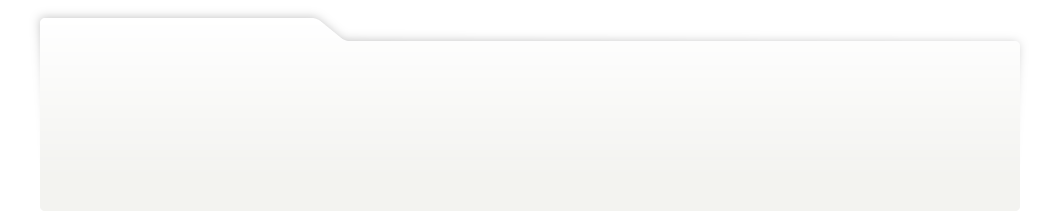
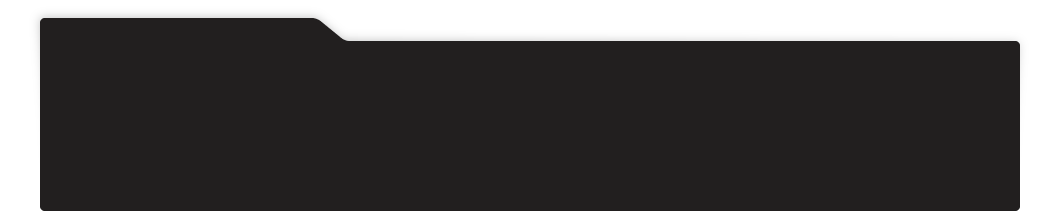
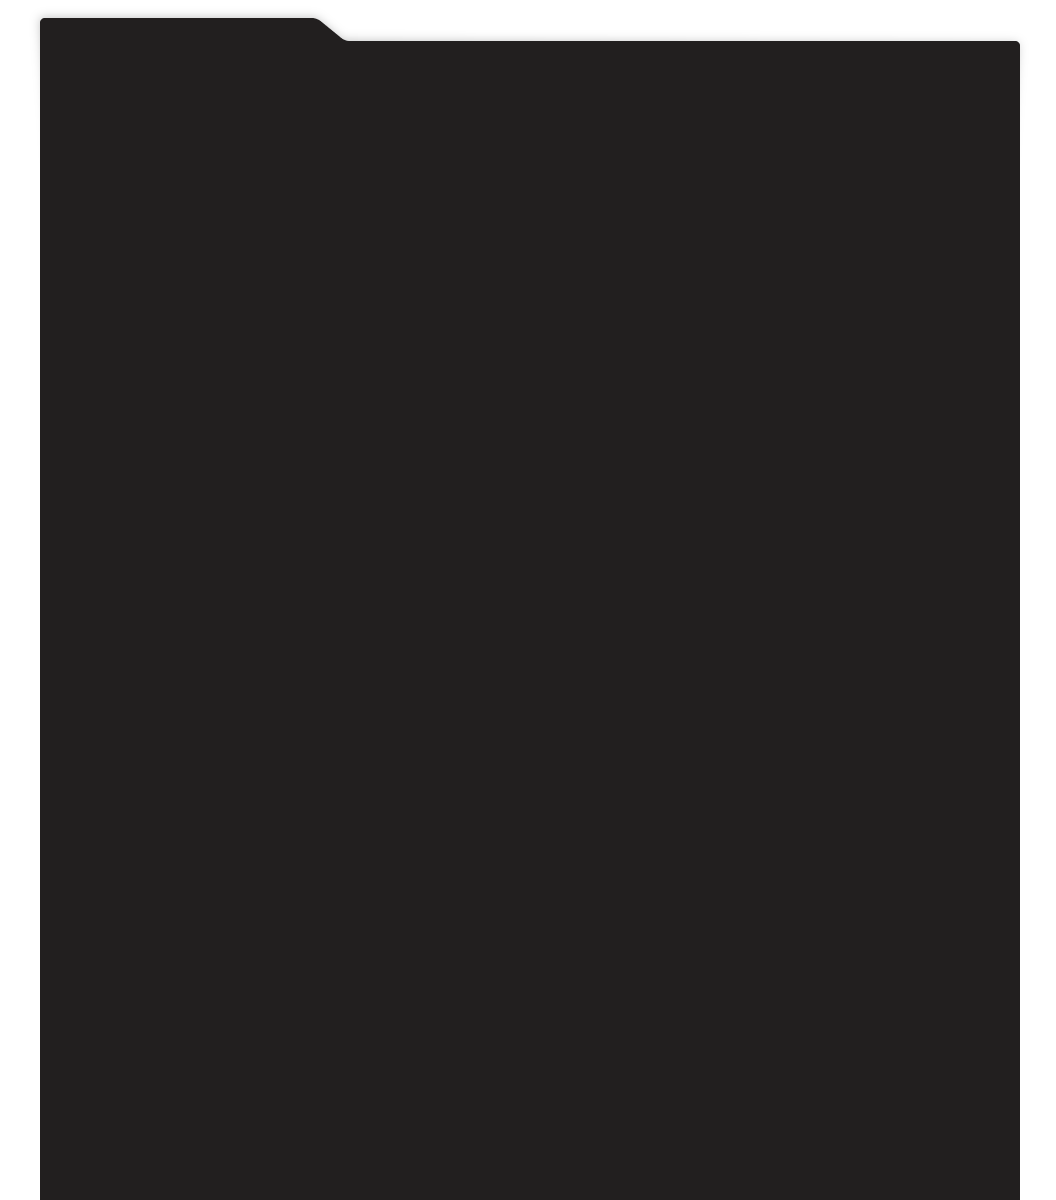
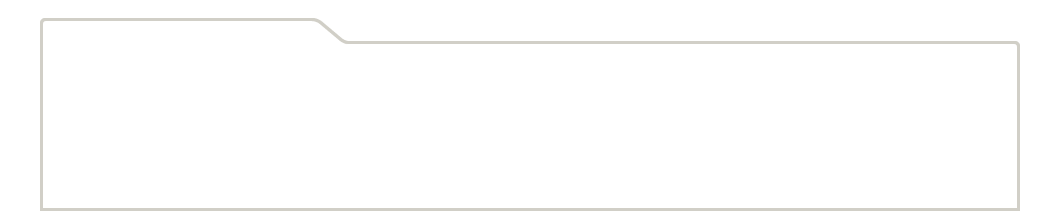
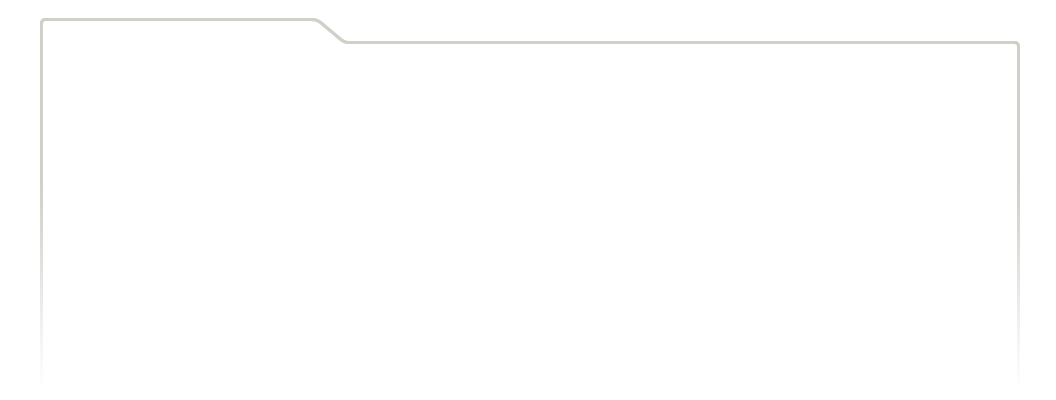
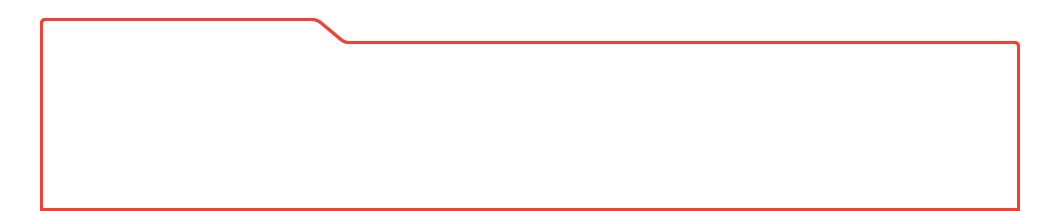
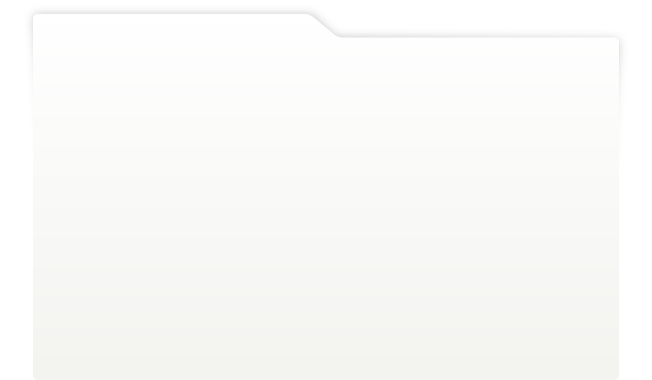
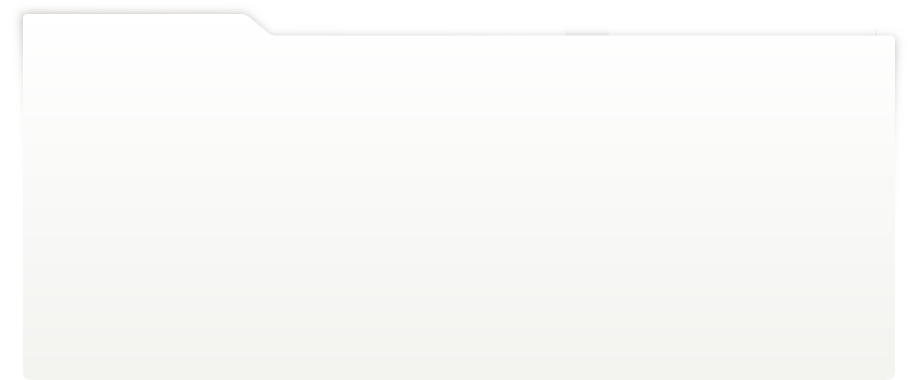
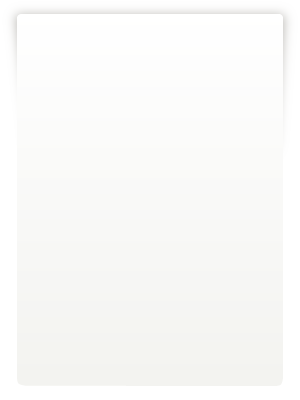
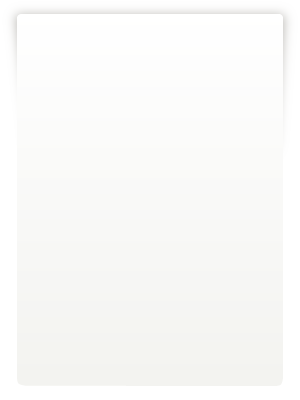
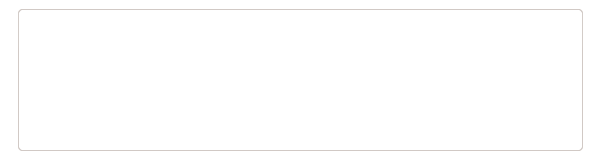
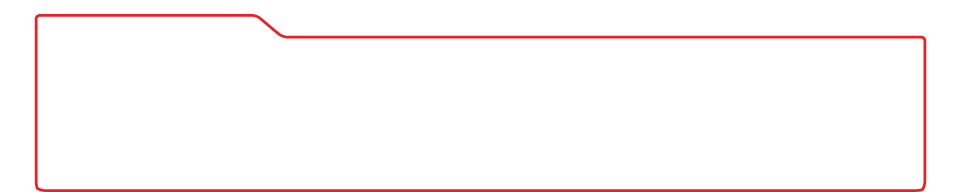
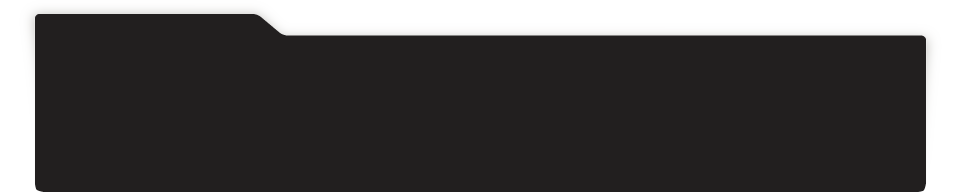
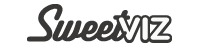
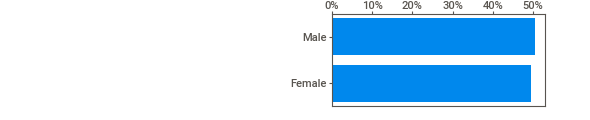
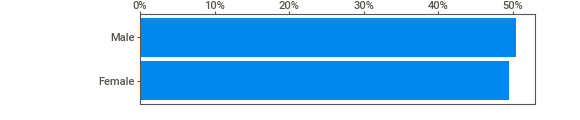
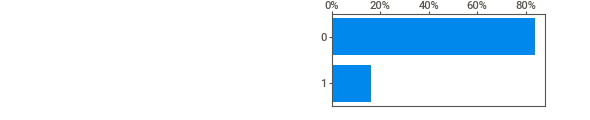
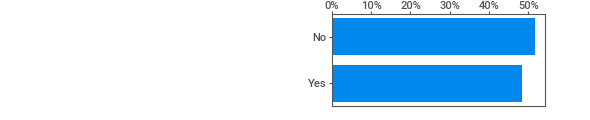
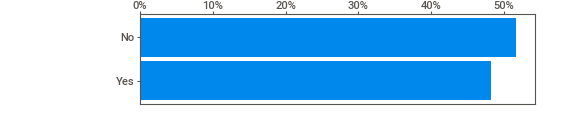
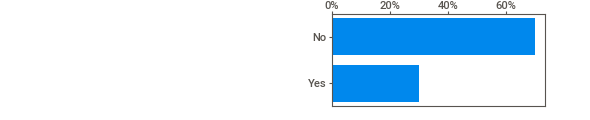
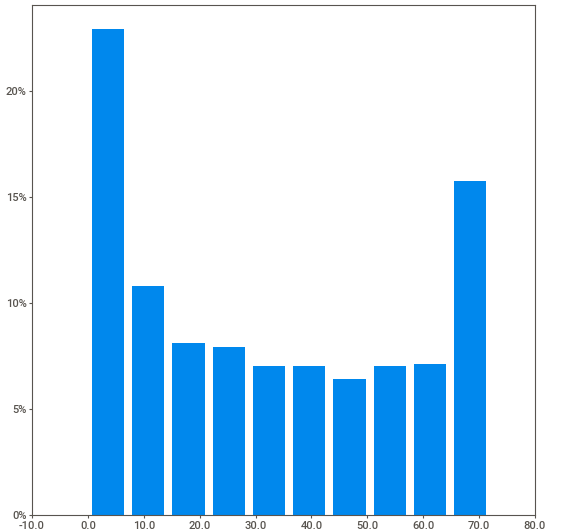
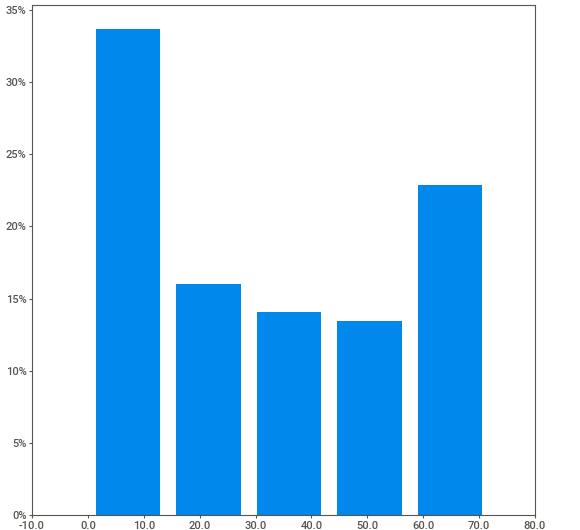
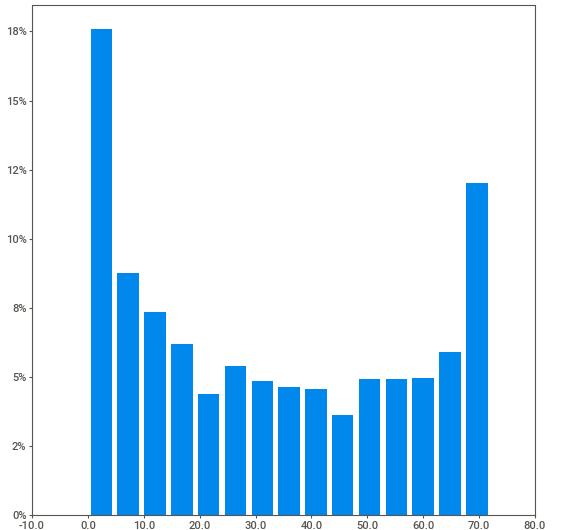
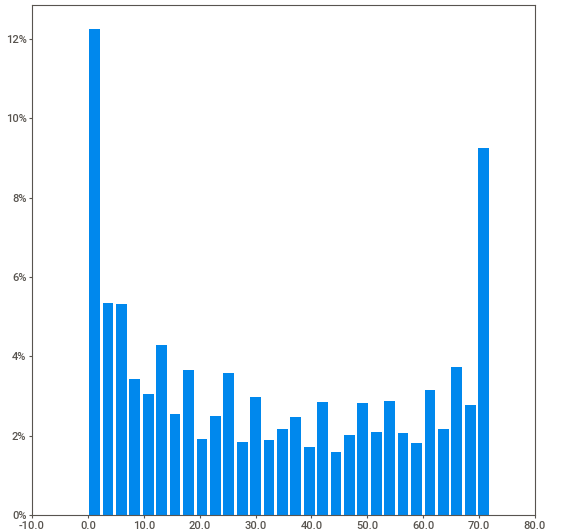
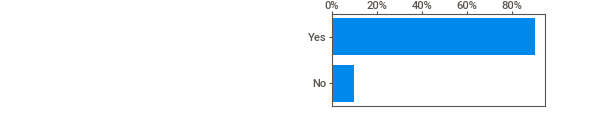
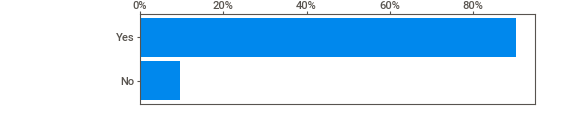
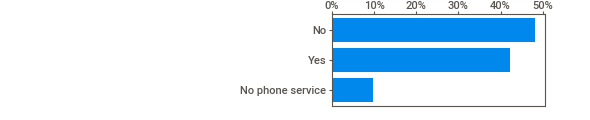
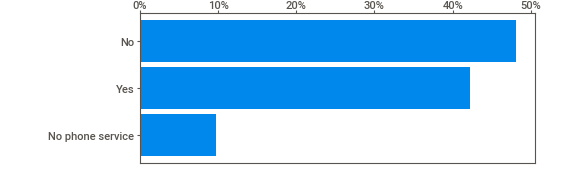
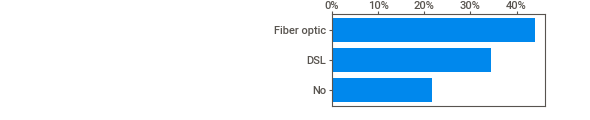
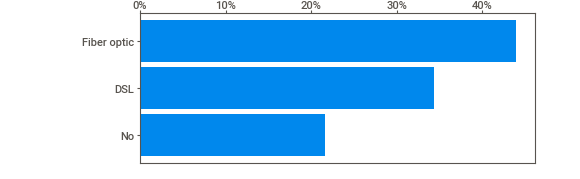
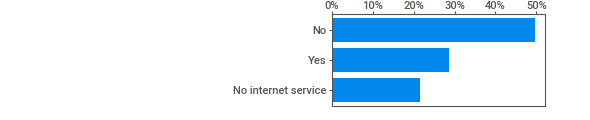
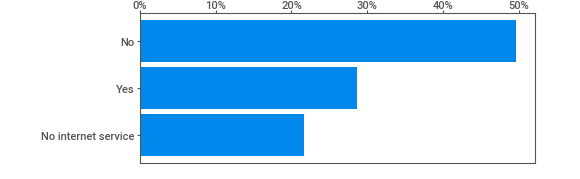
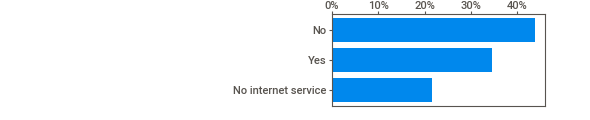
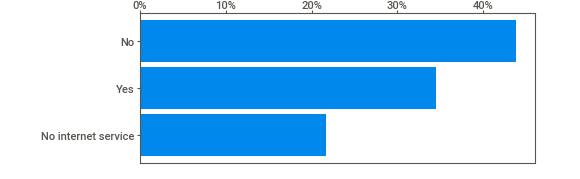
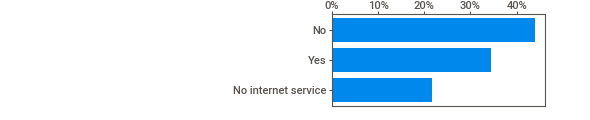
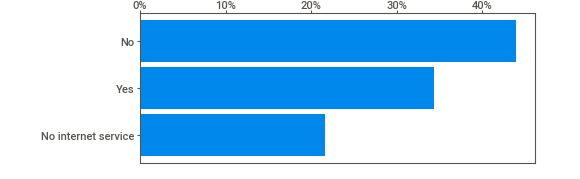
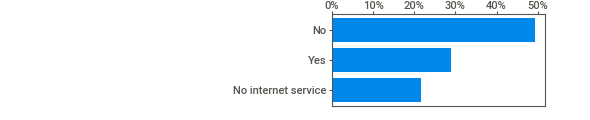
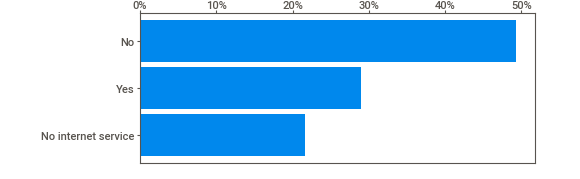
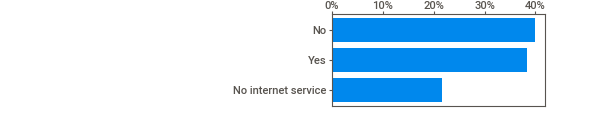
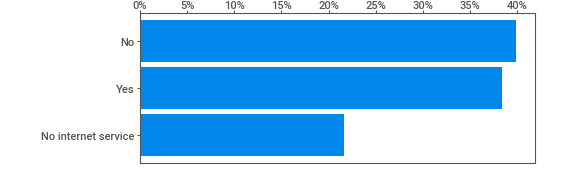
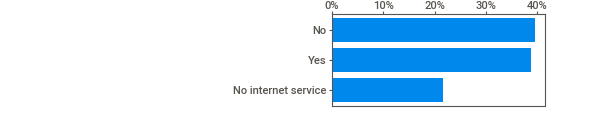
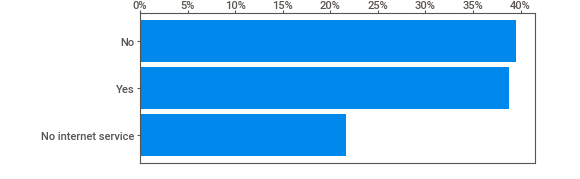
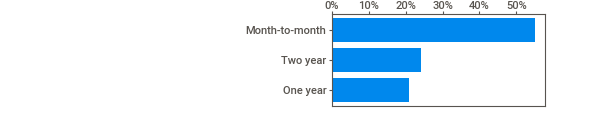
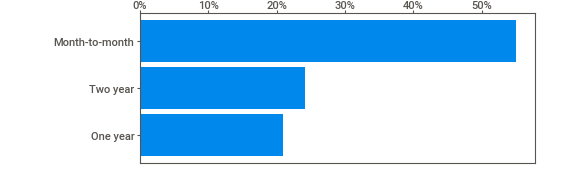
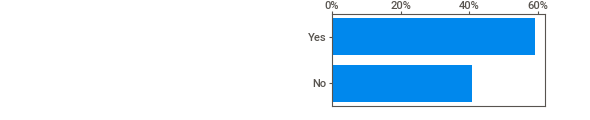
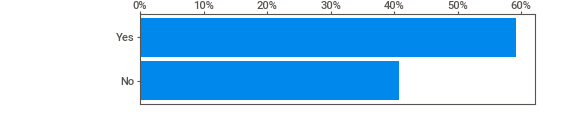
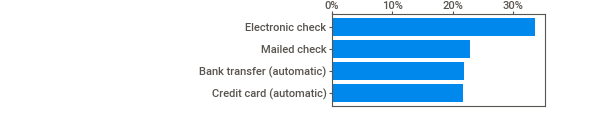
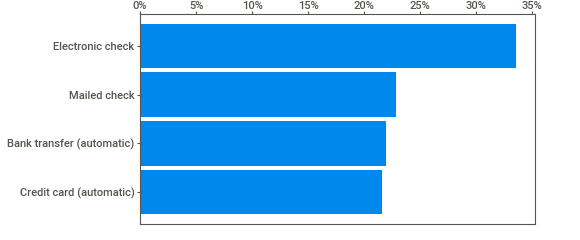
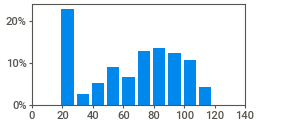
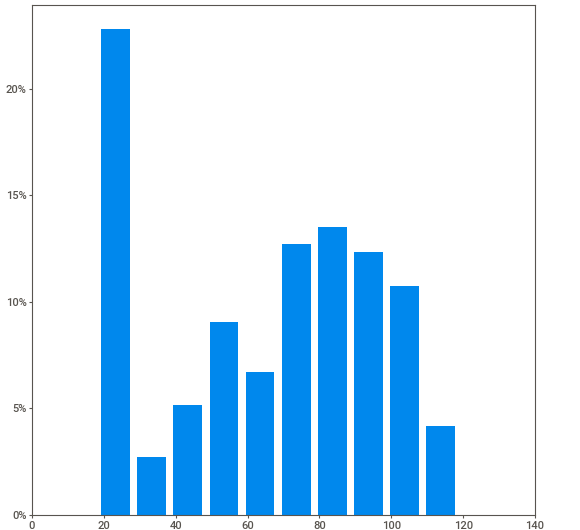
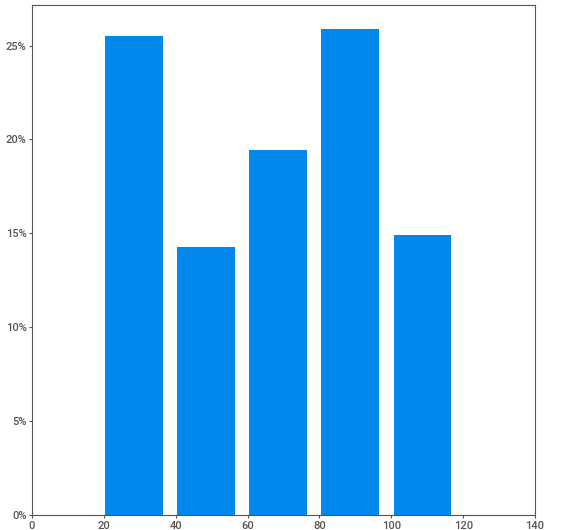
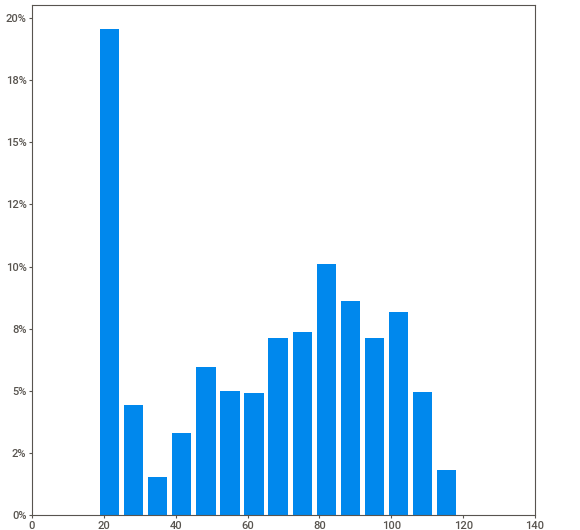
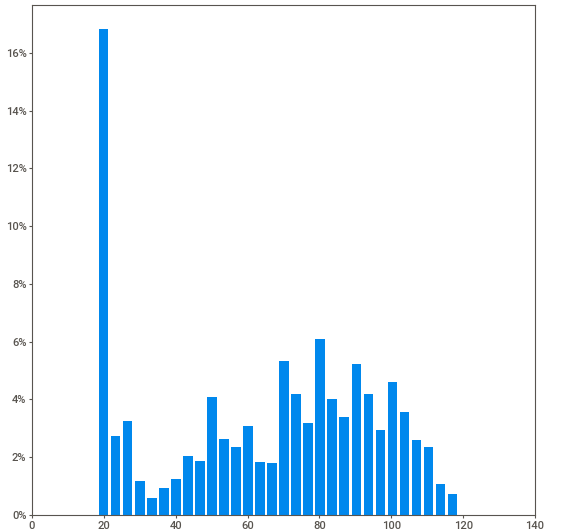
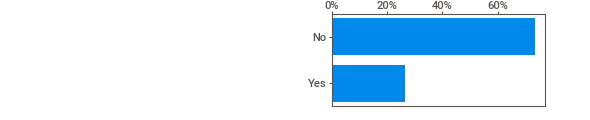
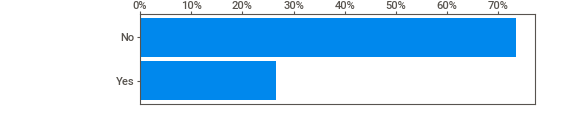
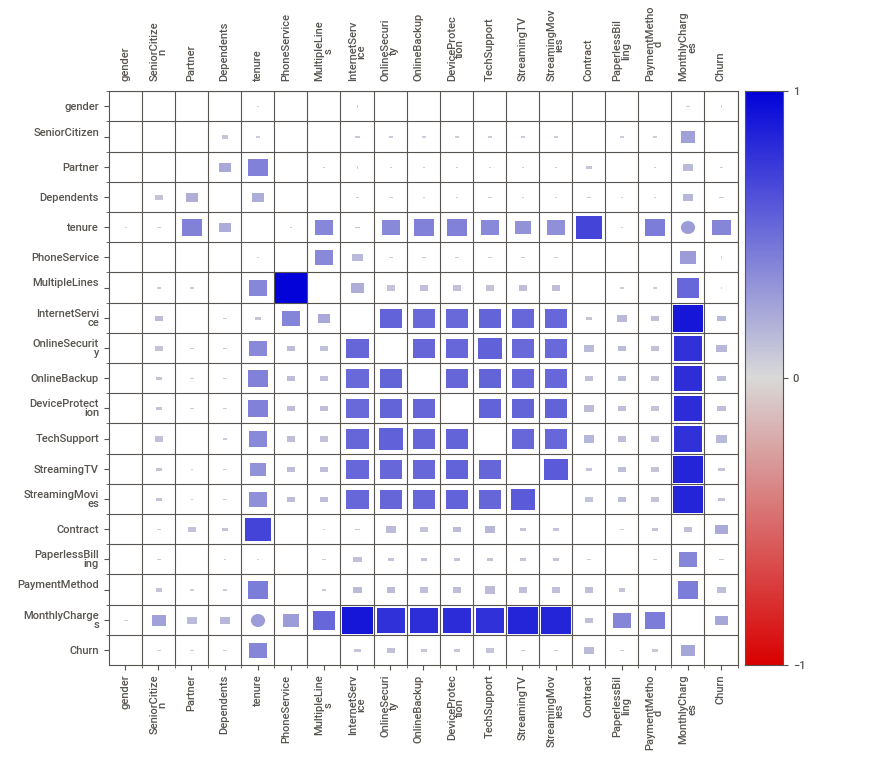
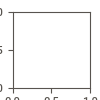

In [14]:
# Displaying the html file in the Google Colab notebook
IPython.display.HTML('SweetViz.html')

<a name="2.3"></a>
### 2.3 Dataprep
Back to [Table of Contents](#0)

[Dataprep](https://github.com/sfu-db/dataprep) is a python package to collect data, perform eda, clean and standardize data.


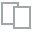
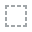
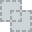
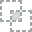
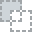
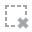
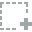
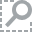
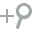
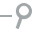
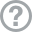
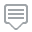
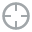
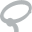
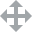
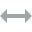
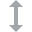
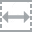
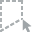
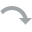
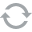
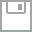
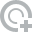
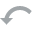
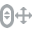
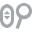
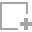
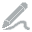
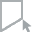
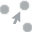
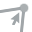
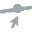

In [15]:
# Plotting the features of the dataframe
plot(df)


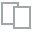
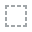
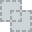
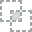
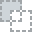
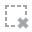
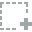
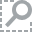
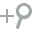
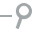
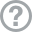
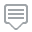
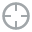
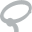
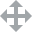
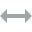
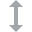
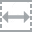
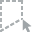
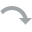
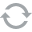
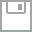
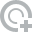
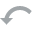
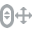
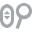
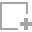
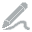
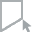
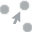
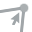
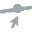

In [16]:
# Plotting the correlation of the dataframe
plot_correlation(df)


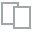
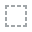
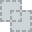
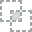
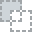
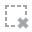
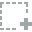
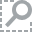
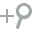
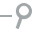
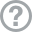
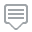
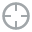
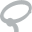
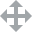
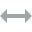
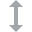
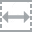
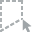
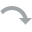
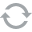
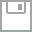
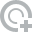
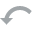
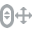
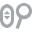
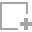
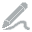
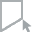
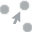
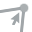
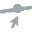

In [17]:
# Analyzing the miissing values from the dataset and visualizing it 
plot_missing(df)

<a name="3"></a>
## 3 
Back to [Table of Contents](#0)

---
